In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Import and view data
heart_rate_df = pd.read_csv('heartrate.csv')
sleep_df = pd.read_csv('sleep.csv')
calories_df = pd.read_csv('calories.csv')
steps_df = pd.read_csv('steps.csv')

print(heart_rate_df.head())
print(sleep_df.head())
print(calories_df.head())
print(steps_df.head())

           Id                  Time  Value
0  2022484408  4/12/2016 7:21:00 AM     97
1  2022484408  4/12/2016 7:21:05 AM    102
2  2022484408  4/12/2016 7:21:10 AM    105
3  2022484408  4/12/2016 7:21:20 AM    103
4  2022484408  4/12/2016 7:21:25 AM    101
           Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0  1503960366  4/12/2016 12:00:00 AM                  1                 327   
1  1503960366  4/13/2016 12:00:00 AM                  2                 384   
2  1503960366  4/15/2016 12:00:00 AM                  1                 412   
3  1503960366  4/16/2016 12:00:00 AM                  2                 340   
4  1503960366  4/17/2016 12:00:00 AM                  1                 700   

   TotalTimeInBed  
0             346  
1             407  
2             442  
3             367  
4             712  
           Id ActivityDay  Calories
0  1503960366   4/12/2016      1985
1  1503960366   4/13/2016      1797
2  1503960366   4/14/2016      1776
3  

In [12]:
# Check for missing values
print(heart_rate_df.isnull().sum())
print(sleep_df.isnull().sum())
print(calories_df.isnull().sum())
print(steps_df.isnull().sum())

Id       0
Time     0
Value    0
dtype: int64
Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64
Id             0
ActivityDay    0
Calories       0
dtype: int64
Id             0
ActivityDay    0
StepTotal      0
dtype: int64


In [13]:
# Converting date and getting means, max and min heart rate.
heart_rate_df['time'] = pd.to_datetime(heart_rate_df['Time'], format='%m/%d/%Y %I:%M:%S %p')
heart_rate_df['date'] = heart_rate_df['time'].dt.date

daily_hr_summary = heart_rate_df.groupby(['date', 'Id'])['Value'].agg(['mean', 'max', 'min']).reset_index()

print(daily_hr_summary)

           date          Id       mean  max  min
0    2016-04-12  2022484408  75.804177  134   52
1    2016-04-12  2347167796  86.082334  172   57
2    2016-04-12  4020332650  83.499014  133   49
3    2016-04-12  4558609924  76.639377  104   57
4    2016-04-12  5553957443  64.365114  106   50
..          ...         ...        ...  ...  ...
329  2016-05-12  4388161847  60.246910  136   44
330  2016-05-12  4558609924  79.677772  117   54
331  2016-05-12  5553957443  64.195323  107   54
332  2016-05-12  6962181067  75.715741  117   60
333  2016-05-12  8877689391  71.087439  122   53

[334 rows x 5 columns]


In [14]:
# Convert columns and format
sleep_df['date'] = pd.to_datetime(sleep_df['SleepDay'], format='%m/%d/%Y %I:%M:%S %p').dt.date
sleep_df = sleep_df.drop(columns=['SleepDay'])

calories_df['date'] = pd.to_datetime(calories_df['ActivityDay'], format='%m/%d/%Y').dt.date
calories_df = calories_df.drop(columns=['ActivityDay'])

steps_df['date'] = pd.to_datetime(steps_df['ActivityDay'], format='%m/%d/%Y').dt.date
steps_df = steps_df.drop(columns=['ActivityDay'])

In [15]:
# Merge data based on date and ID
combined_df = pd.merge(daily_hr_summary, sleep_df, on=['date', 'Id'], suffixes=('_hr', '_sleep'))
combined_df = pd.merge(combined_df, calories_df, on=['date', 'Id'], suffixes=('', '_calories'))
combined_df = pd.merge(combined_df, steps_df, on=['date', 'Id'], suffixes=('', '_steps'))

print(combined_df.head())

         date          Id       mean  max  min  TotalSleepRecords  \
0  2016-04-12  4020332650  83.499014  133   49                  1   
1  2016-04-12  5553957443  64.365114  106   50                  1   
2  2016-04-12  5577150313  65.656074  154   41                  1   
3  2016-04-12  6962181067  85.036320  176   47                  1   
4  2016-04-12  8792009665  68.921576  135   48                  1   

   TotalMinutesAsleep  TotalTimeInBed  Calories  StepTotal  
0                 501             541      3654       8539  
1                 441             464      2026      11596  
2                 419             438      3405       8135  
3                 366             387      1994      10199  
4                 458             493      2044       2564  


In [16]:
# Save merged data into a CSV file
combined_df.to_csv('combined_health_data.csv', index=False)

# Explore the data

In [17]:
print(combined_df.describe())

                 Id        mean         max         min  TotalSleepRecords  \
count  1.820000e+02  182.000000  182.000000  182.000000         182.000000   
mean   5.565561e+09   73.615234  135.467033   49.923077           1.120879   
std    1.651355e+09    8.295873   22.100137    6.159448           0.359102   
min    2.026352e+09   59.377175   80.000000   36.000000           1.000000   
25%    4.388162e+09   67.049029  123.000000   44.250000           1.000000   
50%    5.577150e+09   73.043697  133.000000   50.500000           1.000000   
75%    6.962181e+09   79.368192  148.750000   54.000000           1.000000   
max    8.792010e+09  104.871472  199.000000   70.000000           3.000000   

       TotalMinutesAsleep  TotalTimeInBed     Calories     StepTotal  
count          182.000000      182.000000   182.000000    182.000000  
mean           426.494505      455.016484  2468.961538   8527.554945  
std            116.886059      125.607055   768.330668   4209.325429  
min          

# Visualize data

In [19]:
# Plot steps and calories over time using the combined dataset
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

(array([16904., 16908., 16912., 16916., 16920., 16922., 16926., 16930.,
        16934.]),
 [Text(16904.0, 0, '2016-04-13'),
  Text(16908.0, 0, '2016-04-17'),
  Text(16912.0, 0, '2016-04-21'),
  Text(16916.0, 0, '2016-04-25'),
  Text(16920.0, 0, '2016-04-29'),
  Text(16922.0, 0, '2016-05-01'),
  Text(16926.0, 0, '2016-05-05'),
  Text(16930.0, 0, '2016-05-09'),
  Text(16934.0, 0, '2016-05-13')])

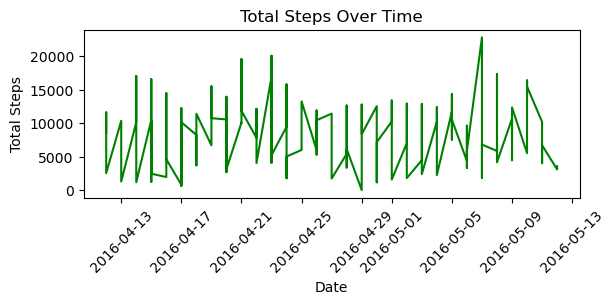

In [20]:
# Plot for total steps over time
plt.subplot(2, 1, 1)
plt.plot(combined_df['date'], combined_df['StepTotal'], label='Steps', color='green')
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.title('Total Steps Over Time')
plt.xticks(rotation=45)

(array([16904., 16908., 16912., 16916., 16920., 16922., 16926., 16930.,
        16934.]),
 [Text(16904.0, 0, '2016-04-13'),
  Text(16908.0, 0, '2016-04-17'),
  Text(16912.0, 0, '2016-04-21'),
  Text(16916.0, 0, '2016-04-25'),
  Text(16920.0, 0, '2016-04-29'),
  Text(16922.0, 0, '2016-05-01'),
  Text(16926.0, 0, '2016-05-05'),
  Text(16930.0, 0, '2016-05-09'),
  Text(16934.0, 0, '2016-05-13')])

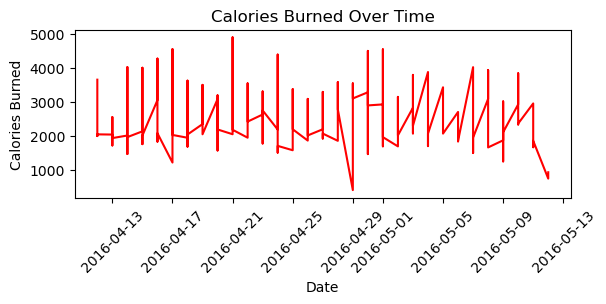

In [21]:
# Plot for calories burned over time
plt.subplot(2, 1, 2)
plt.plot(combined_df['date'], combined_df['Calories'], label='Calories Burned', color='red')
plt.xlabel('Date')
plt.ylabel('Calories Burned')
plt.title('Calories Burned Over Time')
plt.xticks(rotation=45)

In [22]:
# Display the plots
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

# Correlation Analysis

In [23]:
# Calculate the correlation matrix to see relationships between variables
correlation_matrix = combined_df.corr()
print(correlation_matrix)

                          Id      mean       max       min  TotalSleepRecords  \
Id                  1.000000  0.025299 -0.047458 -0.103838          -0.017824   
mean                0.025299  1.000000  0.349061  0.613919          -0.121116   
max                -0.047458  0.349061  1.000000 -0.150596          -0.163789   
min                -0.103838  0.613919 -0.150596  1.000000           0.049188   
TotalSleepRecords  -0.017824 -0.121116 -0.163789  0.049188           1.000000   
TotalMinutesAsleep  0.049294 -0.253834 -0.189125 -0.076617           0.336583   
TotalTimeInBed      0.000603 -0.269129 -0.210178 -0.072095           0.335080   
Calories           -0.087226 -0.013498  0.420218 -0.582185          -0.087048   
StepTotal          -0.179593  0.151018  0.456094 -0.132648          -0.168279   

                    TotalMinutesAsleep  TotalTimeInBed  Calories  StepTotal  
Id                            0.049294        0.000603 -0.087226  -0.179593  
mean                         -0.2

C:\Users\makis\AppData\Local\Temp\ipykernel_6160\3132280891.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_df.corr()


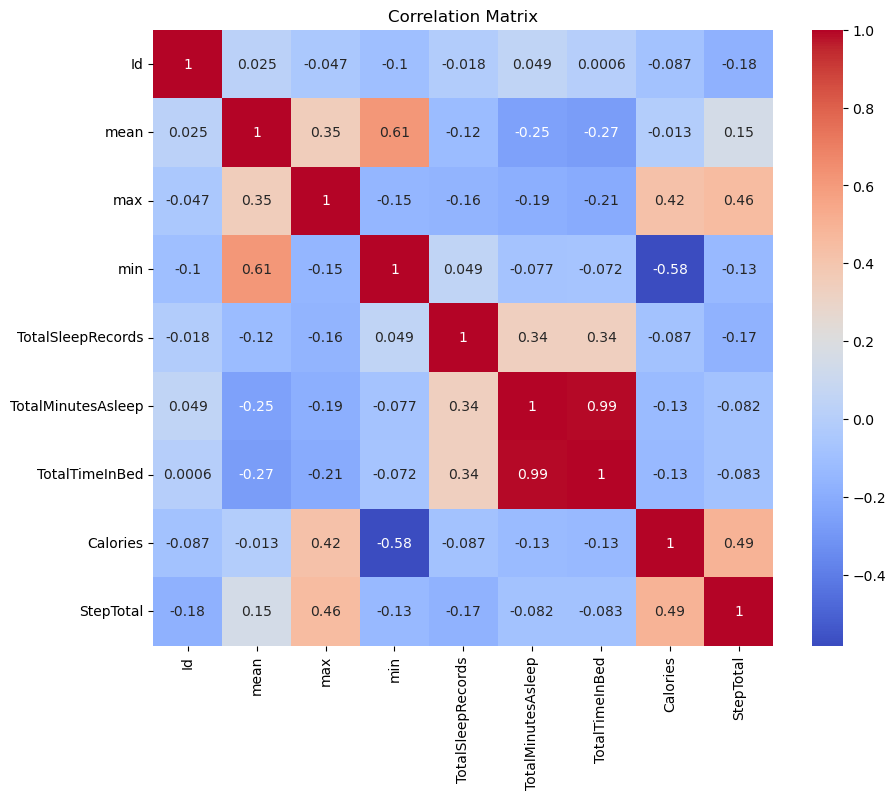

In [24]:
# Visualize the correlation matrix using a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Feature Engineering

In [25]:
# Create a rolling mean of step counts over the last 7 days
combined_df['RollingStepMean'] = combined_df['StepTotal'].rolling(window=7).mean()

In [26]:
# Create a sleep quality feature by dividing total sleep time by time in bed
combined_df['SleepQuality'] = combined_df['TotalMinutesAsleep'] / combined_df['TotalTimeInBed']

In [27]:
#Display the first few rows to verify the new features
print(combined_df[['RollingStepMean', 'SleepQuality']].head())

   RollingStepMean  SleepQuality
0              NaN      0.926063
1              NaN      0.950431
2              NaN      0.956621
3              NaN      0.945736
4              NaN      0.929006
